# conectando ao servidor Big Query do Google

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import bq_helper
stackoverflow = bq_helper.BigQueryHelper("bigquery-public-data","stackoverflow")
# Any results you write to the current directory are saved as output.

Using Kaggle's public dataset BigQuery integration.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta SQL para buscar as tags e numeros de views 

In [8]:
perg2019 = """ select extract(month from creation_date) as mes, tags, view_count
    from `bigquery-public-data.stackoverflow.posts_questions`
    where ((extract(year from creation_date) = 2018 and extract(month from creation_date) > 8) 
    or (extract(year from creation_date) = 2019 and extract(month from creation_date) < 9))
    and (tags like '%java%' or tags like 'javascript'or tags like '%python%' or 
    tags like '%c#%' or tags like '%php%' or tags like 'c++' or tags like '%c%' or
    tags like '%ruby%')
    """

perguntas2019 = stackoverflow.query_to_pandas(perg2019)
perguntas2019.head()

,mes,tags,view_count
0,12,javascript|vis.js,256
1,12,radio-button|django-class-based-views|django-2.0,256
2,12,sql|sql-server-2008|query-performance,256
3,12,performance|graph|redis|redisgraph,256
4,12,mule|mule-studio|mule-component|anypoint-studio,256


# Dados importantes para criar os DataFrame

In [9]:
list_meses = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
list_tags = list(perguntas2019['tags'])
list_tags[:5:]

['javascript|vis.js',
 'radio-button|django-class-based-views|django-2.0',
 'sql|sql-server-2008|query-performance',
 'performance|graph|redis|redisgraph',
 'mule|mule-studio|mule-component|anypoint-studio']

In [11]:
list_views = list(perguntas2019['view_count'])
list_views[:5:]

[256, 256, 256, 256, 256]

In [12]:
list_mes_t = list(perguntas2019['mes'])
list_mes_t[:5:]

[12, 12, 12, 12, 12]

In [13]:
def dicionario_linguagem(linguagem):
    dic = {'mes': ['setembro', 'outubro', 'novembro', 'dezembro', 'janeiro', 'fevereiro', 
            'março', 'abril', 'maio', 'junho', 'julho', 'agosto'],
           'perguntas': [len([list_tags[j] for j in range(len(list_tags)) 
                              if linguagem in list_tags[j].split('|') and i == list_mes_t[j]]) for i in list_meses],
            'views_count': [sum([list_views[j] for j in range(len(list_views))
                                if linguagem in list_tags[j].split('|') and i == list_mes_t[j]]) for i in list_meses]}
    return dic

# Criação de DataFrame diferentes para cada linguagem

In [14]:
dt_python = pd.DataFrame(dicionario_linguagem("python"))
dt_python.head()

,mes,perguntas,views_count
0,setembro,17768,4718881
1,outubro,20288,4676687
2,novembro,20250,4061313
3,dezembro,17696,3256656
4,janeiro,19008,3134401


In [16]:
dt_javascript = pd.DataFrame(dicionario_linguagem('javascript'))
dt_javascript.head()

,mes,perguntas,views_count
0,setembro,18044,4099991
1,outubro,19698,3890436
2,novembro,18395,3565466
3,dezembro,16159,2733416
4,janeiro,18086,2429904


In [17]:
dt_java = pd.DataFrame(dicionario_linguagem('java'))
dt_java.head()

,mes,perguntas,views_count
0,setembro,12285,3209355
1,outubro,14462,2998783
2,novembro,13553,2766987
3,dezembro,12071,2099901
4,janeiro,12816,1875584


In [18]:
dt_ruby = pd.DataFrame(dicionario_linguagem('ruby'))
dt_ruby.head()

,mes,perguntas,views_count
0,setembro,859,107653
1,outubro,984,122262
2,novembro,901,108179
3,dezembro,865,100573
4,janeiro,972,122071


In [19]:
dt_php = pd.DataFrame(dicionario_linguagem('php'))
dt_php.head()

,mes,perguntas,views_count
0,setembro,8700,1450110
1,outubro,9313,1467721
2,novembro,8299,1115507
3,dezembro,7189,996625
4,janeiro,8326,847356


In [20]:
dt_cch = pd.DataFrame(dicionario_linguagem('c#'))
dt_cch.head()

,mes,perguntas,views_count
0,setembro,9375,1844033
1,outubro,10418,1759032
2,novembro,9526,1558786
3,dezembro,8455,1302611
4,janeiro,9833,1307697


In [21]:
dt_cmais = pd.DataFrame(dicionario_linguagem('c++'))
dt_cmais.head()

,mes,perguntas,views_count
0,setembro,4010,763336
1,outubro,4651,725549
2,novembro,4715,650773
3,dezembro,3892,510017
4,janeiro,4232,560296


# Geração de gráficos

## Gráficos de perguntas 

In [22]:
plt.style.use('ggplot')

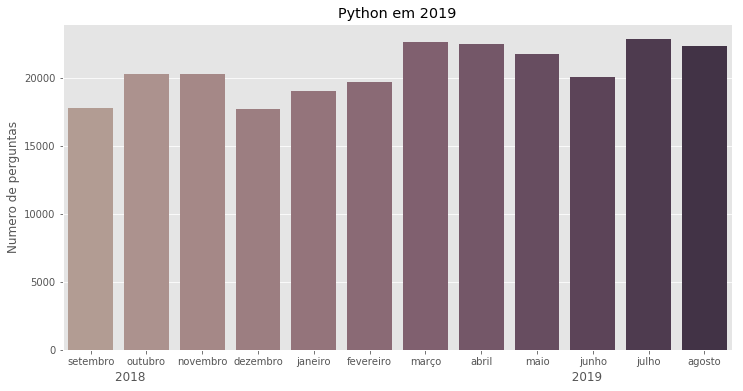

In [30]:
pallete = sns.cubehelix_palette(13, 3, 0.6, 0.9, 0.5, 0.6)
sns.barplot(dt_python['mes'], dt_python['perguntas'], palette=pallete)
plt.title('Python em 2019')
plt.xlabel('2018%s2019%s'%(' '*110, ' '*20))
plt.ylabel('Numero de perguntas')
plt.rcParams['figure.figsize'] = (12,6)
#plt.savefig('pythonBarT.png')
plt.show()

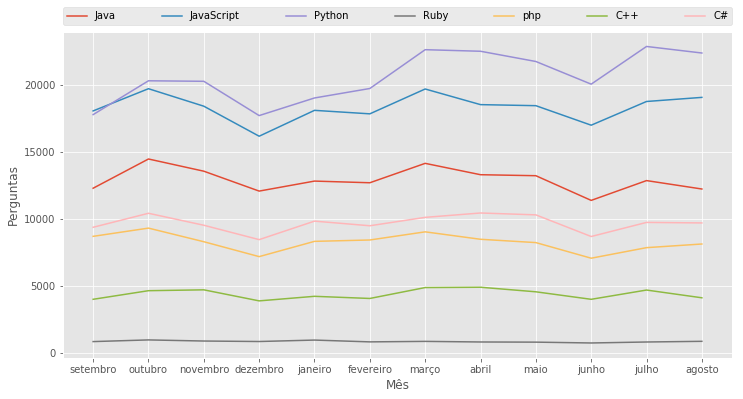

In [31]:
fig, ax = plt.subplots()

line1, = ax.plot(dt_java['mes'], dt_java['perguntas'], label='Java')
line2, = ax.plot(dt_javascript['mes'], dt_javascript['perguntas'], label='JavaScript')
line3, = ax.plot(dt_python['mes'], dt_python['perguntas'], label='Python')
line4, = ax.plot(dt_ruby['mes'], dt_ruby['perguntas'], label='Ruby')
line5, = ax.plot(dt_php['mes'], dt_php['perguntas'], label='php')
line6, = ax.plot(dt_cmais['mes'], dt_cmais['perguntas'], label='C++')
line7, = ax.plot(dt_cch['mes'], dt_cch['perguntas'], label='C#')

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=8, mode="expand", borderaxespad=0.)
plt.xlabel('Mês')
plt.ylabel('Perguntas')
#plt.savefig('geralfinal.png')
plt.show()

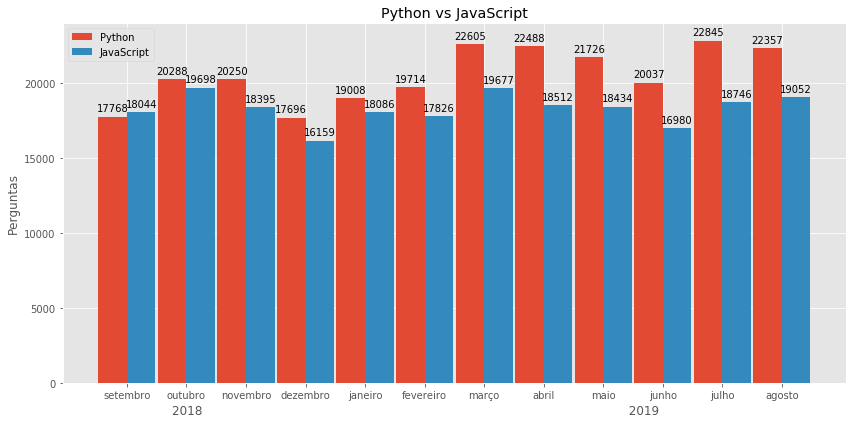

In [32]:
def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
x = np.arange(len(dt_python['mes']))  
width = 0.48

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_python['perguntas'], width, label='Python')
rects2 = ax.bar(x + width/2, dt_javascript['perguntas'], width, label='JavaScript')

ax.set_ylabel('Perguntas')
ax.set_title('Python vs JavaScript')
ax.set_xlabel('2018%s2019%s'%(' '*110, ' '*20))
ax.set_xticks(x)
ax.set_xticklabels(dt_python['mes'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)

fig.tight_layout()
#plt.savefig("PVSJS.png")
plt.show()

## Gráficos para viwes.
### Os gráficos estão decrescente devido a algumas perguntas serem muito recentes. 

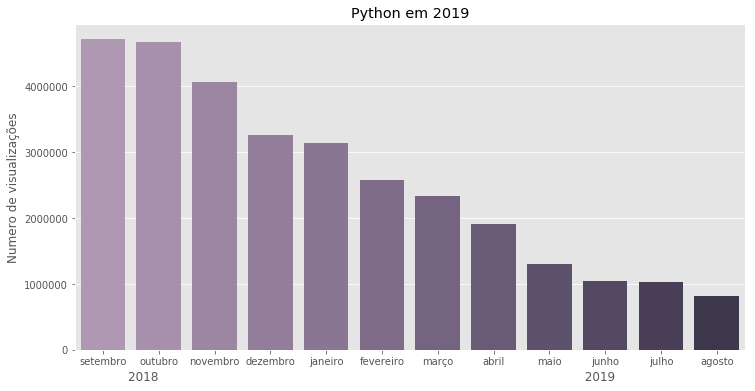

In [33]:
pallete = sns.cubehelix_palette(13, 3, 0.2, 0.9, 0.5, 0.6)
sns.barplot(dt_python['mes'], dt_python['views_count'], palette=pallete)
plt.title('Python em 2019')
plt.xlabel('2018%s2019%s'%(' '*110, ' '*20))
plt.ylabel('Numero de visualizações')
plt.rcParams['figure.figsize'] = (12,6)
#plt.savefig('pythonBarT.png')
plt.show()

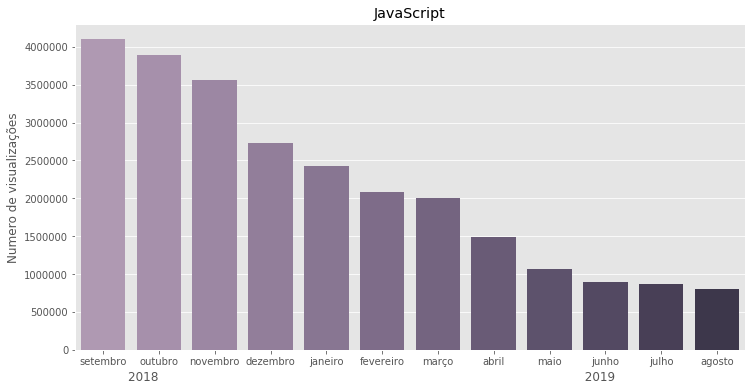

In [34]:
pallete = sns.cubehelix_palette(13, 3, 0.2, 0.9, 0.5, 0.6)
sns.barplot(dt_javascript['mes'], dt_javascript['views_count'], palette=pallete)
plt.title('JavaScript')
plt.xlabel('2018%s2019%s'%(' '*110, ' '*20))
plt.ylabel('Numero de visualizações')
plt.rcParams['figure.figsize'] = (12,6)
#plt.savefig('JavaScript.png')
plt.show()

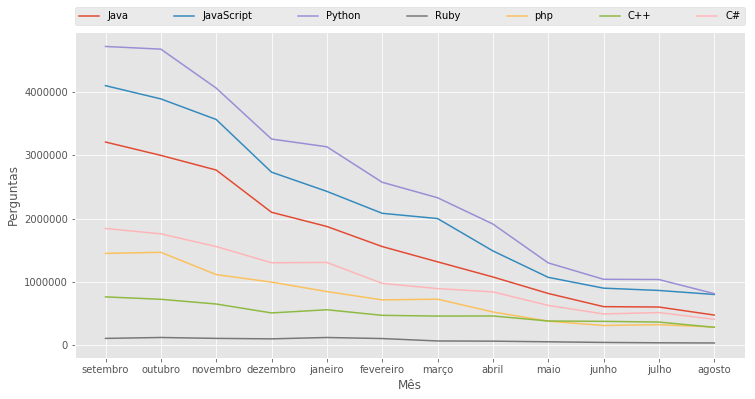

In [35]:
fig, ax = plt.subplots()

line1, = ax.plot(dt_java['mes'], dt_java['views_count'], label='Java')
line2, = ax.plot(dt_javascript['mes'], dt_javascript['views_count'], label='JavaScript')
line3, = ax.plot(dt_python['mes'], dt_python['views_count'], label='Python')
line4, = ax.plot(dt_ruby['mes'], dt_ruby['views_count'], label='Ruby')
line5, = ax.plot(dt_php['mes'], dt_php['views_count'], label='php')
line6, = ax.plot(dt_cmais['mes'], dt_cmais['views_count'], label='C++')
line7, = ax.plot(dt_cch['mes'], dt_cch['views_count'], label='C#')

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=8, mode="expand", borderaxespad=0.)
plt.xlabel('Mês')
plt.ylabel('Perguntas')
plt.savefig('geralviews.png')
plt.show()

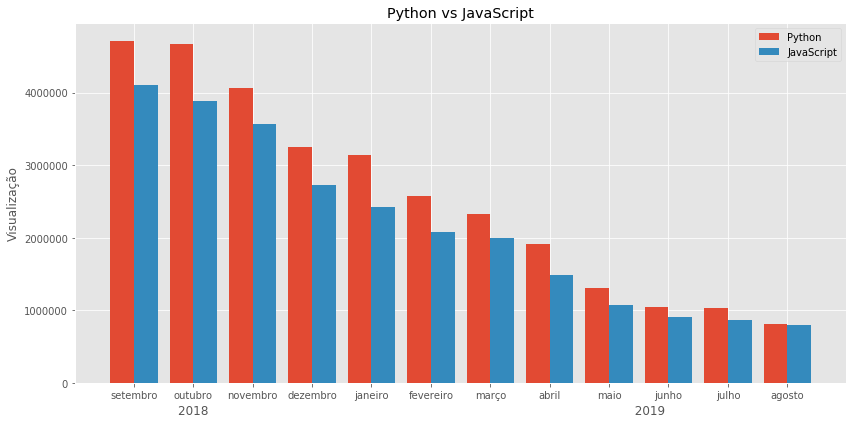

In [28]:
x = np.arange(len(dt_python['mes']))  
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_python['views_count'], width, label='Python')
rects2 = ax.bar(x + width/2, dt_javascript['views_count'], width, label='JavaScript')

ax.set_ylabel('Visualização')
ax.set_title('Python vs JavaScript(Numero de Views)')
ax.set_xlabel('2018%s2019%s'%(' '*110, ' '*20))
ax.set_xticks(x)
ax.set_xticklabels(dt_python['mes'])
ax.legend()


fig.tight_layout()
plt.savefig('PvsJSViews')
plt.show()